# Análise de ponto de equilíbrio

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [2]:
custos_fixos = pd.read_csv('custos_fixos.csv', sep=';')
custos_variaveis = pd.read_csv('custos_variaveis.csv', sep=';')

In [3]:
class PontoDeEquilibrio:

    def __init__(self, custos_fixos, custos_variaveis, valor_unidade, unidades):
        self.custos_fixos = custos_fixos.sort_values(by='valor')
        self.custos_variaveis = custos_variaveis.sort_values(by='valor')
        self.valor_unidade = valor_unidade
        self.unidades = np.arange(unidades)
        
        self.df = pd.DataFrame({'unidades': self.unidades,
                                'despesas por unidade': self.despesas_unidade(),
                                'custos fixos': self.custos_fixos.valor.sum(),
                                'receita': self.receita(),
                                'despesas totais': self.despesas_totais(),
                                'margem de contribuição': self.margem_de_contribuicao(),
                                'lucro': self.lucro()
                                })

    def despesas_unidade(self):
        return self.custos_variaveis.valor.sum()*self.unidades

    def receita(self):
        return self.valor_unidade*self.unidades

    def despesas_totais(self):
        return self.custos_fixos.valor.sum() + (self.custos_variaveis.valor.sum()*self.unidades)

    def margem_de_contribuicao(self):
        return self.receita() - self.despesas_unidade()

    def lucro(self):
        return self.receita()-self.despesas_totais()

    def equilibrio(self):
        return np.ceil(self.custos_fixos.valor.sum()/(self.valor_unidade - self.custos_variaveis.valor.sum()))
    
    def plot_custos(self, data, title='title', palette='Blues', height=8, width=12):
        fig, ax = pyplot.subplots(figsize=(width, height))
        sns.barplot(data=data, x='categoria', y='valor',
                    palette=palette).set_title(title)

    def plot(self, col='unidades', height=8, width=12, title='Ponto de Equilíbrio'):
        df_aux = self.df[['unidades', 'custos fixos', 'despesas totais', 'receita']].melt(
            col, var_name='categoria', value_name='valor')
        fig, ax = pyplot.subplots(figsize=(width, height))
        sns.lineplot(x=col, y="valor", hue='categoria',
                     data=df_aux, ax=ax).set_title(title)

In [4]:
pe = PontoDeEquilibrio(custos_fixos, custos_variaveis, 100, 30001)

## Distribuição dos custos fixos

In [5]:
pe.custos_fixos

,categoria,valor
4,"Água, energia e outros serviços",30500.0
0,Terreno,42500.0
5,Seguro,99700.0
3,Equipamento de escritório,212800.0
1,Instalações,332500.0
2,Maquinaria de produção,532000.0


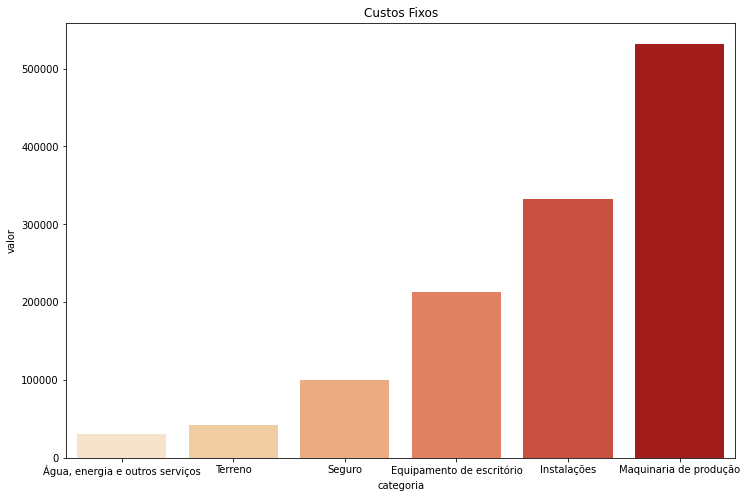

In [6]:
pe.plot_custos(pe.custos_fixos, title='Custos Fixos', palette='OrRd')

## Distribuição dos custos variáveis

In [7]:
pe.custos_variaveis

,categoria,valor
1,Propaganda,1.0
2,Expedição e recebimento,5.0
0,Mão-de-obra,15.0


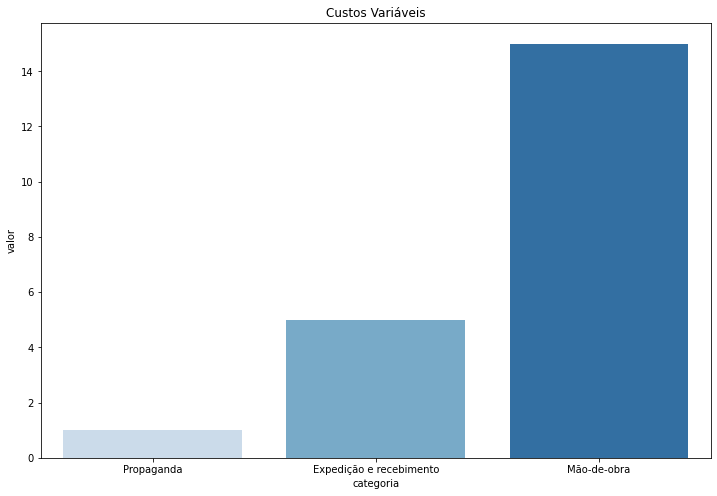

In [8]:
pe.plot_custos(pe.custos_variaveis, title='Custos Variáveis')

## Tabela de valores por unidades vendidas

In [9]:
pe.df

,unidades,despesas por unidade,custos fixos,receita,despesas totais,margem de contribuição,lucro
0,0,0.0,1250000.0,0,1250000.0,0.0,-1250000.0
1,1,21.0,1250000.0,100,1250021.0,79.0,-1249921.0
2,2,42.0,1250000.0,200,1250042.0,158.0,-1249842.0
3,3,63.0,1250000.0,300,1250063.0,237.0,-1249763.0
4,4,84.0,1250000.0,400,1250084.0,316.0,-1249684.0
...,...,...,...,...,...,...,...
29996,29996,629916.0,1250000.0,2999600,1879916.0,2369684.0,1119684.0
29997,29997,629937.0,1250000.0,2999700,1879937.0,2369763.0,1119763.0
29998,29998,629958.0,1250000.0,2999800,1879958.0,2369842.0,1119842.0
29999,29999,629979.0,1250000.0,2999900,1879979.0,2369921.0,1119921.0


## Ponto de equilíbrio

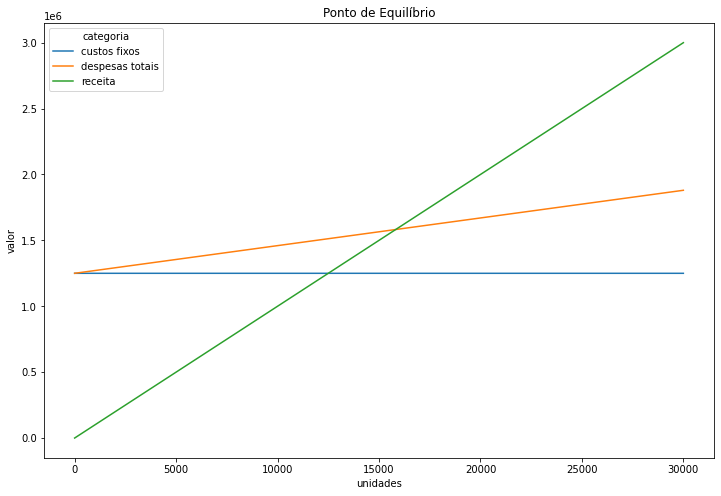

In [10]:
pe.plot()

De acordo com o gráfico, é possível enxergar que o ponto de equilíbrio se encontra após a marca de 15.000 unidades vendidas.

In [11]:
pe.equilibrio()

15823.0

In [12]:
df = pe.df
df[df.lucro>=0]

,unidades,despesas por unidade,custos fixos,receita,despesas totais,margem de contribuição,lucro
15823,15823,332283.0,1250000.0,1582300,1582283.0,1250017.0,17.0
15824,15824,332304.0,1250000.0,1582400,1582304.0,1250096.0,96.0
15825,15825,332325.0,1250000.0,1582500,1582325.0,1250175.0,175.0
15826,15826,332346.0,1250000.0,1582600,1582346.0,1250254.0,254.0
15827,15827,332367.0,1250000.0,1582700,1582367.0,1250333.0,333.0
...,...,...,...,...,...,...,...
29996,29996,629916.0,1250000.0,2999600,1879916.0,2369684.0,1119684.0
29997,29997,629937.0,1250000.0,2999700,1879937.0,2369763.0,1119763.0
29998,29998,629958.0,1250000.0,2999800,1879958.0,2369842.0,1119842.0
29999,29999,629979.0,1250000.0,2999900,1879979.0,2369921.0,1119921.0


Consultando a tabela de valores por unidade, é possível verificar que o ponto de equiíbrio se está em 15.823 unidades (por ano).

# Análise de sensibilidade

## Variando a mão-de-obra

Qual o impacto no ponto de equilíbrio se variar a mão-de-obra entre US\\$12 e US\\$17?

In [13]:
df = pd.DataFrame(columns=['custo', 'unidades', 'despesas totais', 'receita'])
for mao_de_obra in range(12, 18):
    analise_variavel = custos_variaveis.copy()
    analise_variavel.loc[0, 'valor'] = mao_de_obra

    pe_temp = PontoDeEquilibrio(custos_fixos, analise_variavel, 100, 30001)

    print('Mão-de-obra: {mao_de_obra}\t\tPonto de Equilíbrio: {equilibrio} (unidades)'.format(
        mao_de_obra=mao_de_obra, equilibrio=pe_temp.equilibrio()))

Mão-de-obra: 12		Ponto de Equilíbrio: 15244.0 (unidades)
Mão-de-obra: 13		Ponto de Equilíbrio: 15433.0 (unidades)
Mão-de-obra: 14		Ponto de Equilíbrio: 15625.0 (unidades)
Mão-de-obra: 15		Ponto de Equilíbrio: 15823.0 (unidades)
Mão-de-obra: 16		Ponto de Equilíbrio: 16026.0 (unidades)
Mão-de-obra: 17		Ponto de Equilíbrio: 16234.0 (unidades)


## Variando seguro

Qual o impacto no ponto de equilíbrio se variar o custo de seguro de 90.000 a 110.000 anualmente (incrementando US\\$ 10.000 por vez)?

In [14]:
for seguro in range(90000, 120000, 10000):
    analise_fixa = custos_fixos.copy()
    analise_fixa.loc[5, 'valor'] = seguro

    pe_temp = PontoDeEquilibrio(analise_fixa, custos_variaveis, 100, 30001)

    print('Seguro: {seguro}\t\tPonto de Equilíbrio: {equilibrio} (unidades)'.format(
        seguro=seguro, equilibrio=pe_temp.equilibrio()))

Seguro: 90000		Ponto de Equilíbrio: 15700.0 (unidades)
Seguro: 100000		Ponto de Equilíbrio: 15827.0 (unidades)
Seguro: 110000		Ponto de Equilíbrio: 15954.0 (unidades)


## Variando a mão-de-obra e seguro simultaneamente

In [18]:
df = pd.DataFrame(columns=['Mão-de-obra', 'Seguro', 'Ponto de equilíbrio'])
for mao_de_obra in range(12, 18):
    analise_variavel = custos_variaveis.copy()
    analise_variavel.loc[0, 'valor'] = mao_de_obra

    for seguro in range(90000, 120000, 10000):
        analise_fixa = custos_fixos.copy()
        analise_fixa.loc[5, 'valor'] = seguro

        pe_temp = PontoDeEquilibrio(analise_fixa, analise_variavel, 100, 30001)

        print('Mão-de-obra: {mao_de_obra}\t\tSeguro: {seguro}\t\tPonto de Equilíbrio: {equilibrio} (unidades)'.format(
            mao_de_obra=mao_de_obra, seguro=seguro, equilibrio=pe_temp.equilibrio()))

        df_temp = pd.DataFrame({'Mão-de-obra': mao_de_obra,
                                'Seguro': seguro,
                                'Ponto de equilíbrio': pe_temp.equilibrio()
                                }, index=[0])
        df = df.append(df_temp, ignore_index=True)

Mão-de-obra: 12		Seguro: 90000		Ponto de Equilíbrio: 15126.0 (unidades)
Mão-de-obra: 12		Seguro: 100000		Ponto de Equilíbrio: 15248.0 (unidades)
Mão-de-obra: 12		Seguro: 110000		Ponto de Equilíbrio: 15370.0 (unidades)
Mão-de-obra: 13		Seguro: 90000		Ponto de Equilíbrio: 15313.0 (unidades)
Mão-de-obra: 13		Seguro: 100000		Ponto de Equilíbrio: 15436.0 (unidades)
Mão-de-obra: 13		Seguro: 110000		Ponto de Equilíbrio: 15560.0 (unidades)
Mão-de-obra: 14		Seguro: 90000		Ponto de Equilíbrio: 15504.0 (unidades)
Mão-de-obra: 14		Seguro: 100000		Ponto de Equilíbrio: 15629.0 (unidades)
Mão-de-obra: 14		Seguro: 110000		Ponto de Equilíbrio: 15754.0 (unidades)
Mão-de-obra: 15		Seguro: 90000		Ponto de Equilíbrio: 15700.0 (unidades)
Mão-de-obra: 15		Seguro: 100000		Ponto de Equilíbrio: 15827.0 (unidades)
Mão-de-obra: 15		Seguro: 110000		Ponto de Equilíbrio: 15954.0 (unidades)
Mão-de-obra: 16		Seguro: 90000		Ponto de Equilíbrio: 15902.0 (unidades)
Mão-de-obra: 16		Seguro: 100000		Ponto de Equilíbrio: 16

Conclusão: quando variamos o custo da mão de obra, o ponto de equilíbrio pode variar entre 15244 e 16234. Já quando a variação ocorre sobre o seguro, o ponto de equilíbrio pode variar entre 15700 e 15954 (pelos valores indicados). Nesse sentido, **a variação do custo da mão de obra tem um impacto maior sobre o ponto de equilíbrio em relação ao custo com seguro**.

<AxesSubplot:xlabel='Mão-de-obra', ylabel='Ponto de equilíbrio'>

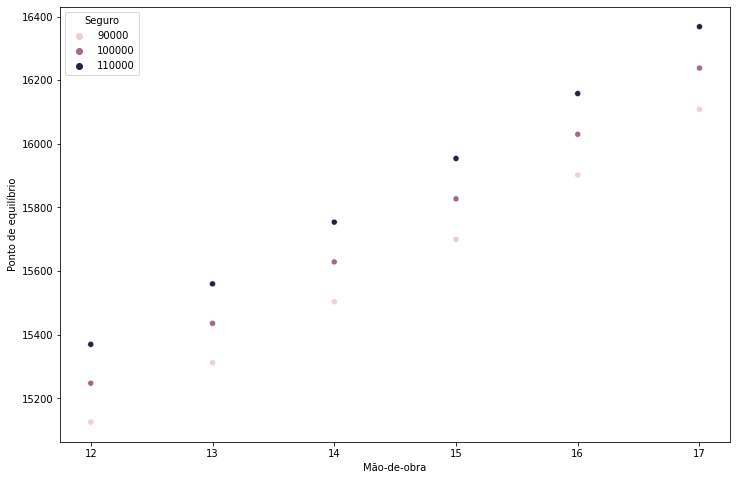

In [41]:
fig, ax = pyplot.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='Mão-de-obra', y='Ponto de equilíbrio', hue='Seguro')

<AxesSubplot:xlabel='Mão-de-obra', ylabel='Seguro'>

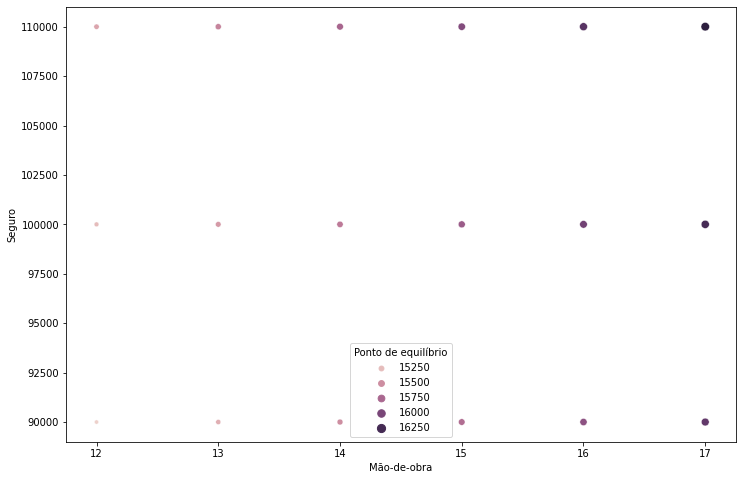

In [42]:
fig, ax = pyplot.subplots(figsize=(12, 8))
sns.scatterplot(data=df, x='Mão-de-obra', y='Seguro', size='Ponto de equilíbrio', hue='Ponto de equilíbrio')